# **Name : Nivedita Chandra**
**Data Science & Business Analytics Intern at The Sparks Foundation**

# **Task : Prediction Using Decision Tree Algorithm**
**Problem Statement :** Create the Decision Tree Classifier and visualize it graphically.

**Importing Libraries**

In [1]:
import pandas as pd
import io
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style= 'white', color_codes= True)

import warnings
warnings.filterwarnings('ignore')

**Importing Dataset**

In [2]:
# Reading data from the source location
from google.colab import files
uploaded= files.upload()

Saving task6_data_iris.csv to task6_data_iris (3).csv


In [3]:
iris= pd.read_csv(io.BytesIO(uploaded['task6_data_iris.csv']))
print(iris)

      Id  SepalLengthCm  ...  PetalWidthCm         Species
0      1            5.1  ...           0.2     Iris-setosa
1      2            4.9  ...           0.2     Iris-setosa
2      3            4.7  ...           0.2     Iris-setosa
3      4            4.6  ...           0.2     Iris-setosa
4      5            5.0  ...           0.2     Iris-setosa
..   ...            ...  ...           ...             ...
145  146            6.7  ...           2.3  Iris-virginica
146  147            6.3  ...           1.9  Iris-virginica
147  148            6.5  ...           2.0  Iris-virginica
148  149            6.2  ...           2.3  Iris-virginica
149  150            5.9  ...           1.8  Iris-virginica

[150 rows x 6 columns]


In [4]:
# Summary Statistics
iris.drop('Id', axis= 1, inplace= True)
iris.info()
iris.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [5]:
# To check unique value
iris.nunique()

SepalLengthCm    35
SepalWidthCm     23
PetalLengthCm    43
PetalWidthCm     22
Species           3
dtype: int64

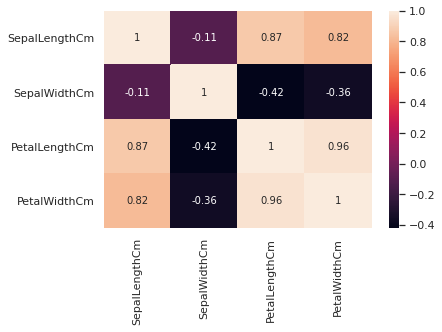

In [6]:
# Correlation via heatmap
sns.heatmap(iris.corr(), annot= True)

From the above correlaation matrix, it can be concluded that Petal Length & Petal Width, Petal Length & Sepal Length, Petal Width & Sepal Length are significantly correlated.

** **
# **Data Preprocessing**

In [7]:
# Encoding categorical (target) variable
from sklearn.preprocessing import LabelEncoder
LE= LabelEncoder()
Y= iris.iloc[:, -1].values
Y= LE.fit_transform(Y)
print(Y)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [8]:
# Splitting data into training and test set
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test= train_test_split(iris.drop('Species', axis= 1), Y, test_size= 0.25, random_state= 50)

In [9]:
# Standardizing the data
from sklearn.preprocessing import StandardScaler
SS= StandardScaler()
X_train= SS.fit_transform(X_train)
X_test= SS.fit_transform(X_test)

** **
# **Decision Tree Classifier**

In [10]:
# Implementing Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
DTC= DecisionTreeClassifier(criterion= 'entropy', random_state=50)
DTC.fit(X_train, Y_train)
print('Decision Tree Classifer Executed')

Decision Tree Classifer Executed


In [11]:
# Prediction for test set
Y_pred= DTC.predict(X_test)

** **
# **Model Accuracy**

In [12]:
# Calculating Confusion Matrix and Accuracy of the fitted model
from sklearn.metrics import confusion_matrix, accuracy_score
CM= confusion_matrix(Y_test, Y_pred)
print('Confusion Matrix : \n', CM) 
accuracy= accuracy_score(Y_test, Y_pred)
print('\n Accuracy of the Decision Tree Model is :', accuracy*100, '%')

Confusion Matrix : 
 [[11  0  0]
 [ 0 15  0]
 [ 0  1 11]]

 Accuracy of the Decision Tree Model is : 97.36842105263158 %


** **
# **Decision Tree Plot**

In [13]:
# Importing necesaary libraries to plot Decision Tree
from sklearn.externals.six import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus

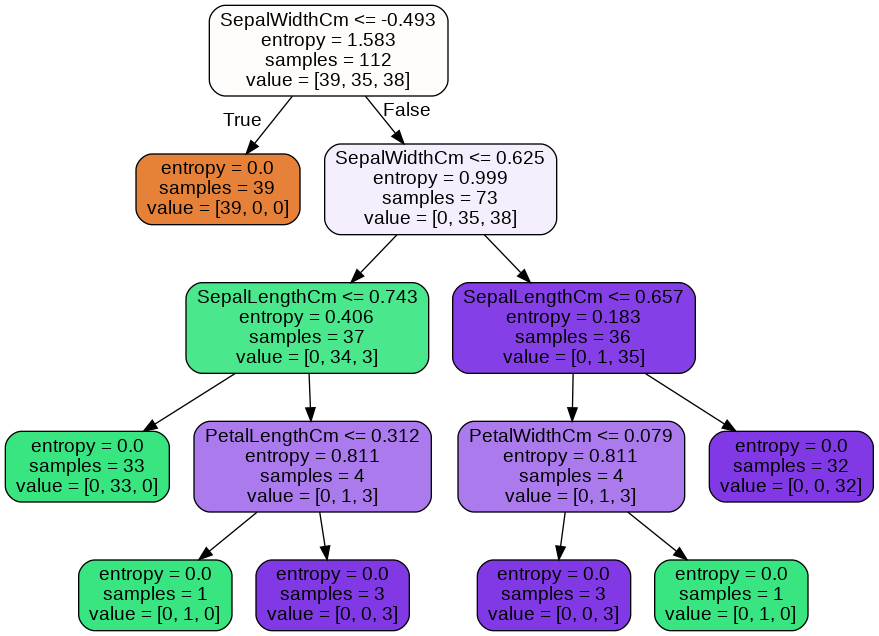

In [14]:
# Plotting Decision Tree
dot_data= StringIO()
export_graphviz(DTC, out_file= dot_data, feature_names= ['PetalLengthCm', 'PetalWidthCm', 'SepalLengthCm', 'SepalWidthCm'],
                filled= True, rounded= True)
graph= pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

# **Thank You :)**